In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:04<00:00, 280MB/s]
100% 1.06G/1.06G [00:04<00:00, 247MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 117ms/step - loss: 1.6305 - accuracy: 0.5956 - val_loss: 0.6289 - val_accuracy: 0.6548
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5893 - accuracy: 0.6946 - val_loss: 0.5368 - val_accuracy: 0.7244
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4969 - accuracy: 0.7594 - val_loss: 0.5524 - val_accuracy: 0.7210
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4278 - accuracy: 0.8043 - val_loss: 0.5239 - val_accuracy: 0.7660
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3895 - accuracy: 0.8250 - val_loss: 0.4821 - val_accuracy: 0.7792
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3276 - accuracy: 0.8586 - val_loss: 0.4520 - val_accuracy: 0.7786
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2490 - accuracy: 0.8967 - val_loss: 0.4614 - val_ac

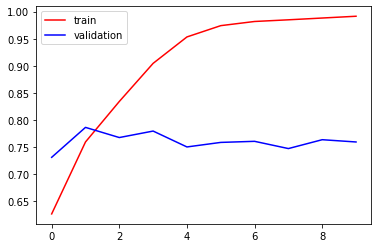

In [ ]:
import matplotlib.pyplot as plt

# Old Plot
plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()

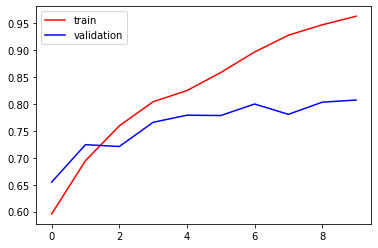

In [ ]:
# New Plot

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

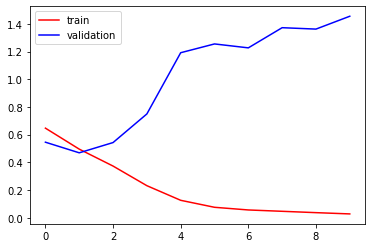

In [ ]:
# Old Plot
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label='validation')
plt.legend()
plt.show()

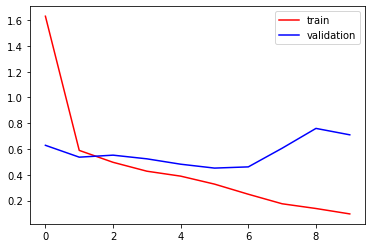

In [ ]:
# New plot
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label='validation')
plt.legend()
plt.show()

In [ ]:
# way to reduce overfitting

# add more data
# Data Augumentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jfif')

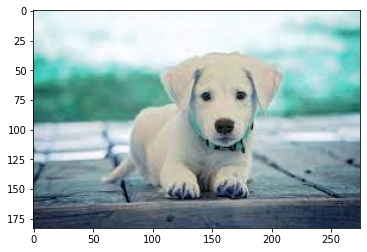

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:

test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

array([[0.]], dtype=float32)

In [ ]:
# predict the new cat image

In [ ]:
test_img2 = cv2.imread('/content/cat.jfif')

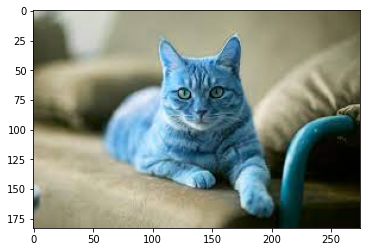

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(183, 275, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape(1,256,256,3)

In [ ]:
model.predict(test_input2)

array([[0.]], dtype=float32)